In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#creating dataset
data = {
    "Name": ["Aman", "Riya", "Karan", "Neha", "Arjun", "Sanya", "Mehul", "Tina"],
    "Age": [25, 27, 26, 120, 28, 30, 5, 29],       # Outliers: 120, 5
    "Salary": [35000, 40000, 42000, 500000, 38000, 36000, 1000, 39000]  # Outliers: 500000, 1000
}

df = pd.DataFrame(data)
print(df)

    Name  Age  Salary
0   Aman   25   35000
1   Riya   27   40000
2  Karan   26   42000
3   Neha  120  500000
4  Arjun   28   38000
5  Sanya   30   36000
6  Mehul    5    1000
7   Tina   29   39000


#### Detection of Outliers

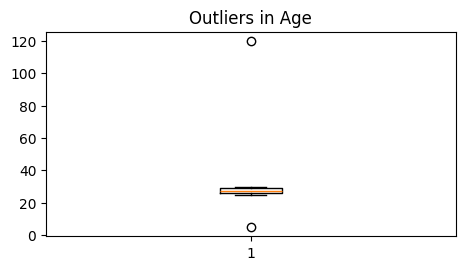

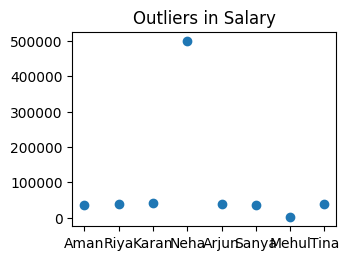

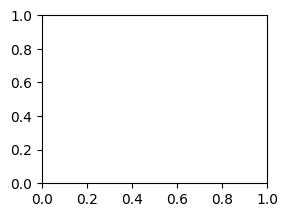

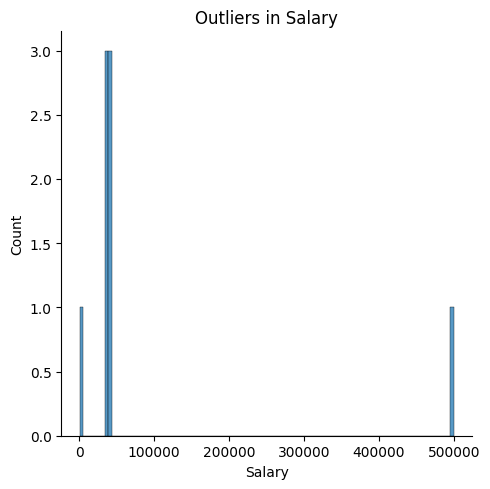

In [26]:
#using graphs

plt.figure(figsize = (9,5))

plt.subplot(2,2,1)
plt.boxplot(df["Age"])
plt.title("Outliers in Age")
plt.tight_layout()
plt.show()

plt.subplot(2,2,2)
plt.scatter(x = df["Name"],y = df["Salary"])
plt.title("Outliers in Salary")
plt.tight_layout()
plt.show()

plt.subplot(2,2,3)
sns.displot(df["Salary"])
plt.title("Outliers in Salary")
plt.tight_layout()
plt.show()


In [28]:
#using stats technique
# Z_SCORE METHOD

import pandas as pd
import numpy as np
from scipy import stats

# Small dataset
df = pd.DataFrame({"Age": [25, 27, 26, 120, 28, 30, 5, 29]})

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df["Age"]))
print(z_scores)

# Detect outliers
outliers = df[z_scores > 2]
print("Outliers:\n", outliers)

[0.34579596 0.28432112 0.31505854 2.5742588  0.2535837  0.19210887
 0.96054433 0.22284628]
Outliers:
    Age
3  120


In [23]:
# IQR TECHNIQUE

# Small dataset
df = pd.DataFrame({"Salary": [35000, 40000, 42000, 500000, 38000, 36000, 1000, 39000]})

Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Salary"] < lower_bound) | (df["Salary"] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
    Salary
3  500000
6    1000


#### Remove outliers

In [ ]:
#using IQR
# for the above DataFrame
df_new = df[(df["Salary"] <= upper_bound)]      # data without outliers
df_new

,Salary
0,35000
1,40000
2,42000
4,38000
5,36000
6,1000
7,39000


In [ ]:
#using Z_SCORE
df = pd.DataFrame({"Age": [25, 27, 26, 120, 28, 30, 5, 29]})

z_scores = np.abs(stats.zscore(df["Age"]))

df['z_scores'] = z_scores

df_clean = df[df["z_scores"] <= 2]         #data without outliers
df_clean

,Age,z_scores
0,25,0.345796
1,27,0.284321
2,26,0.315059
4,28,0.253584
5,30,0.192109
6,5,0.960544
7,29,0.222846
